In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [15]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')


In [16]:
df= df.iloc[:100000,:]
df.to_csv('eda_using_basic_data_functions_in_python_light.csv', index = False,header = True)

In [18]:
df = pd.read_csv('eda_using_basic_data_functions_in_python_light.csv')
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               100000 non-null  object
 1   number_of_strikes  100000 non-null  int64 
 2   center_point_geom  100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [3]:
# Inspect the first 10 rows.
df.head(10)

,Unnamed: 0,date,number_of_strikes,center_point_geom
0,0,2018-01-03,194,POINT(-75 27)
1,1,2018-01-03,41,POINT(-78.4 29)
2,2,2018-01-03,33,POINT(-73.9 27)
3,3,2018-01-03,38,POINT(-73.8 27)
4,4,2018-01-03,92,POINT(-79 28)
5,5,2018-01-03,119,POINT(-78 28)
6,6,2018-01-03,35,POINT(-79.3 28)
7,7,2018-01-03,60,POINT(-79.1 28)
8,8,2018-01-03,41,POINT(-78.7 28)
9,9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape

(100000, 4)

In [5]:
# Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         100000 non-null  int64 
 1   date               100000 non-null  object
 2   number_of_strikes  100000 non-null  int64 
 3   center_point_geom  100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


# Convert the date column to datetime
- convert to datetime using the pandas function to_datetime()
- sort_values() returns the results in descending order of total strikes for each day in the data.
- dt.month extracts just the month information (as a numeric value) from the date
- convert the month number to text using the datetime function dt.month_name()
- str.slice omits the text after the first three letters

In [6]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

In [7]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

,Unnamed: 0,number_of_strikes,center_point_geom
date,,,
2018-02-20,38286482,277495,POINT(-94.1 36.9)POINT(-98 37.1)POINT(-98 36.9...
2018-02-21,45576472,269927,POINT(-98.7 26.8)POINT(-98.6 26.8)POINT(-98.5 ...
2018-02-07,23918062,186769,POINT(-97.6 26.2)POINT(-97.5 26.3)POINT(-97.4 ...
2018-06-02,238302230,174049,POINT(-102.3 48)POINT(-76.8 20.7)POINT(-77.1 2...
2018-04-14,130396500,171319,POINT(-91 26.1)POINT(-91.5 26.1)POINT(-91.4 26...
2018-02-24,48525067,166061,POINT(-93.7 35.3)POINT(-93.6 35.3)POINT(-92.4 ...
2018-02-22,36984510,161454,POINT(-99.1 31.6)POINT(-94.4 31.4)POINT(-94.3 ...
2018-05-20,177468750,154254,POINT(-94.3 38)POINT(-94.2 38)POINT(-94.1 38)P...
2018-05-15,168903053,153536,POINT(-95.9 37)POINT(-99.3 30.4)POINT(-91.1 37...


In [8]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

,Unnamed: 0,date,number_of_strikes,center_point_geom,month
0,0,2018-01-03,194,POINT(-75 27),1
1,1,2018-01-03,41,POINT(-78.4 29),1
2,2,2018-01-03,33,POINT(-73.9 27),1
3,3,2018-01-03,38,POINT(-73.8 27),1
4,4,2018-01-03,92,POINT(-79 28),1


In [9]:
# Calculate total number of strikes per month
df[['number_of_strikes','month']].groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
5,2224500
2,1739692
4,832286
6,746721
1,602021
3,442233


In [10]:
# Create a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,Unnamed: 0,date,number_of_strikes,center_point_geom,month,month_txt
0,0,2018-01-03,194,POINT(-75 27),1,Jan
1,1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,4,2018-01-03,92,POINT(-79 28),1,Jan


In [11]:
# Create a new helper dataframe for plotting.
df_by_month = df[['month','month_txt','number_of_strikes']].groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,602021
1,2,Feb,1739692
2,3,Mar,442233
3,4,Apr,832286
4,5,May,2224500
5,6,Jun,746721


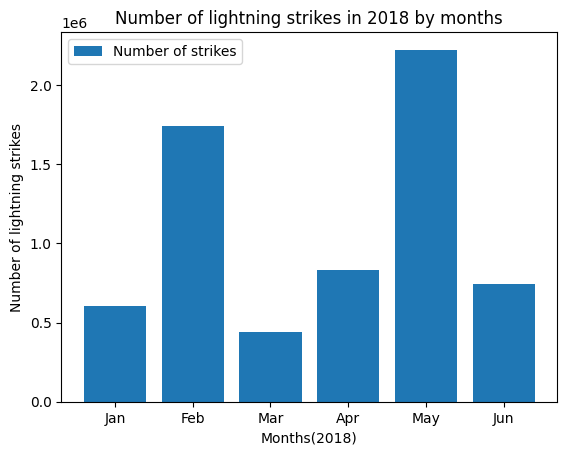

In [12]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()